In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
import scipy

JAMES SORAKRIS CHALADLAMSAKUL 5880068

Rules:
- Open book, open notes, open google, open wolfram alpha. No chat no forum post.
- 8 Problem 100 each.
- Full score = 720.
- Comment your code. Write your code with good style.
- For problem 6, 7, 8 there is a +10 bonus for each problem on good coding style.

0.5833333333333334

# 1) Easy Stuff

1.1) Use gaussian elimination to solve the following system of equations. You can do it by hands. No need to implement one. And no do not use np.linalg.solve(only use it for checking answer).

$$
\begin{bmatrix}
1 & -1 & 1 \\
2 & -1 & 3 \\
-1 & 3 & 4 \\
\end{bmatrix}
\begin{bmatrix}
x\\
y \\
z
\end{bmatrix}
=
\begin{bmatrix}
4 \\
17 \\
29
\end{bmatrix}
$$

In [7]:
def solveSysEq(A, B):
    def forward(A, B):
        newA = A.copy()
        newB = B.copy()
        for pivot_row in range(len(A)):
            for pivot_elim in range(pivot_row+1,len(A)):
                c = newA[pivot_elim][pivot_row]/newA[pivot_row,pivot_row]
                newA[pivot_elim] = newA[pivot_elim]-(c*newA[pivot_row])
                newB[pivot_elim] = newB[pivot_elim]-(c*newB[pivot_row])
        for pivot_row in range(len(A)-1, -1, -1):
            for pivot_elim in range(pivot_row-1, -1, -1):
                c = newA[pivot_elim][pivot_row]/newA[pivot_row,pivot_row]
                newA[pivot_elim] = newA[pivot_elim]-(c*newA[pivot_row])
                newB[pivot_elim] = newB[pivot_elim]-(c*newB[pivot_row])
        return newA, newB
    def backward(A, B):
        newA = A.copy()
        newB = B.copy()
        for pivot_row in range(len(A)):
            newB[pivot_row]=newB[pivot_row]/newA[pivot_row][pivot_row]

        return newB
    
    Ap, Bp =forward(A,B)
    return backward(Ap, Bp)

A = np.array(
[
    [1, -1, 1],
    [2, -1, 3],
    [-1, 3, 4]
]
)
B = np.array([4,17,29])
print("My ans:",solveSysEq(A,B))
print("Buildin ans:",np.linalg.solve(A,B))

My ans: [3 4 5]
Buildin ans: [ 3.  4.  5.]


1.2) Random number manipulation. 

Use **np.random.rand()** which generate uniform random real number from 0-1. To generate the following random number generator which generates

1.2.1) A uniform random real number from 63-90

In [18]:
width=90-63
n= 100000

In [19]:
np.random.rand(n)*width+63

array([ 88.4015891 ,  68.0254518 ,  86.26636452, ...,  79.1692718 ,
        64.92641688,  70.48053586])

1.2.2) A random ** integer ** which gives -1 40% of the time and  0 20% and 1 40% of the time.

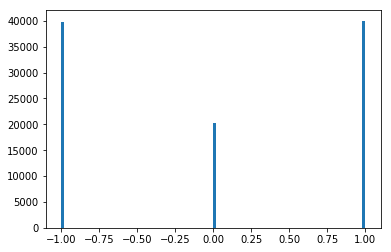

In [34]:
def wierdRandInt():
    r = np.random.rand()
    if r <0.40:
        return -1
    elif r<0.60:
        return 0
    else:
        return 1
x=[wierdRandInt() for i in range(100000)]
plt.hist(x, bins=100);    

# 2) System of Non-linear Equations

Find **all solutions** to the following system of non linear equations using Newton's Method given that $x \in [-10,10]$ and $y \in [-10, 10]$
$$x^3 + y^3 = 9.8667 - xy$$
$$y^2  = 2x + 20$$

In [2]:
#give me ALL solutions

In [51]:
def u(x,y):
    return (x**3) +(y**3) +(x*y) -9.8667
def v(x,y):
    return (y**2)-(2*x)-20


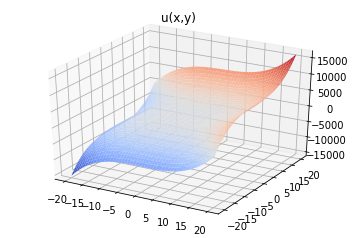

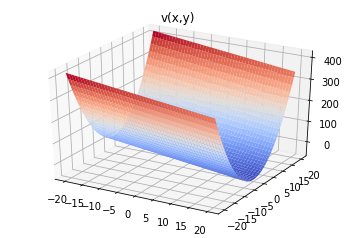

In [52]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy) ##<<<<<<And this too.   

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('u(x,y)')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')        
ucs = ax.plot_surface(xgrid, ygrid, vz, cmap=cm.coolwarm)
plt.title('v(x,y)')

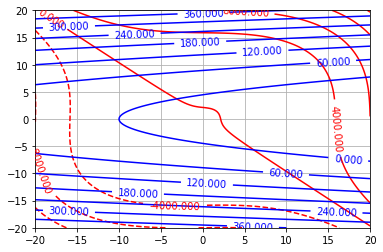

In [53]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)


ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

(-3.1021233783813837, 3.714263485973663)
(6.1024939014517026, -5.6749438590089518)


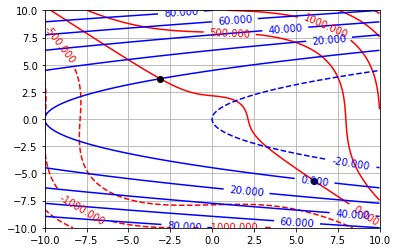

In [69]:
def u(x,y):
    return (x**3) +(y**3) +(x*y) -9.8667
def v(x,y):
    return (y**2)-(2*x)-20
def dudx(x,y):
    return y+ 3*x**2
def dudy(x,y):
    return x+ 3*y**2
def dvdx(x,y):
    return -2
def dvdy(x,y):
    return 2*y
def newtonMethod(x0,y0, n):
    if (n==0):
        return (x0,y0)
    
    else:
        B = np.array([-u(x0,y0)+ dudx(x0,y0)*x0 + dudy(x0,y0)*y0, 
                      -v(x0,y0)+ dvdx(x0,y0)*x0 + dvdy(x0,y0)*y0])
        A = np.array(
            [
                [dudx(x0,y0), dudy(x0,y0)],
                [dvdx(x0,y0), dvdy(x0,y0)]
            ]
        )
        newx, newy =np.linalg.solve(A,B)
        return newtonMethod(newx, newy, n-1)

#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-10,10,nx)
y = np.linspace(-10,10,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
vz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = u(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        vz[iy,ix] = v(xx,yy)


ucs = plt.contour(x, y, uz, colors=('r'))
plt.clabel(ucs, inline=1, fontsize=10)
vcs = plt.contour(x, y, vz, colors=('b'))
plt.clabel(vcs, inline=1, fontsize=10)
plt.grid()

ans1 = newtonMethod(0,2.5,10)
plt.plot(ans1[0], ans1[1],"o", color="black")
print(ans1)
ans2 = newtonMethod(5,-5,10)
plt.plot(ans2[0], ans2[1],"o", color="black")
print(ans2)


# 3) Gradient Descent.

3.1) (70) Implement a gradient descent method to find the **minimum** location of the following function. Note that You ** must ** use analytic gradient.

$$f(x,y) = (x-1)^4 + (x-y)^4 + (y-2)^4 - 10 $$

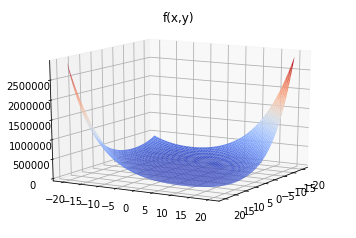

In [70]:

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
def f(x,y):
    return (x-1)**4 + (x-y)**4 + (y-2)**4 -10
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.gca().view_init(elev=15., azim=30)
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('f(x,y)')

x: 1.46032053209 y: 1.85047247929 -9.93143012615


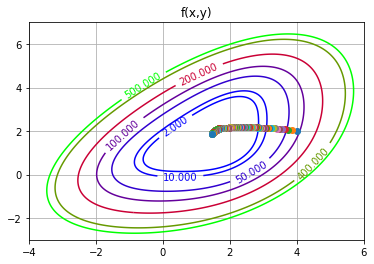

In [89]:
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
nx = 200
ny = 200
x = np.linspace(-4,6,nx)
y = np.linspace(-3,7,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

def gradf(x,y):
    one =4*(((x-1)**3)+(x-y)**3)
    two = 4*( ((y-2)**2) - ((x-y)**3) )
    return np.array([one, two])
def ultimateGradDesc(xn,lamb,k):
    plt.plot(xn[0],xn[1], "o")
    for i in range(k):
        xn = xn - lamb*gradf(xn[0],xn[1])
        plt.plot(xn[0],xn[1], "o")
    return xn

x1,y1 = ultimateGradDesc(np.array([4,2]),0.001,1000)
print("x:",x1,"y:",y1,f(x1,y1))

3.2) (30) Answer the following questions.

3.2.1) Does Gradient Descent guarantee to converge to absolute minimum?


Gradient Descent method doesn’t guarantee convergence as
the learning rate get large.

3.2.2) What is wrong with large learning rate($\lambda$)?


Too big you went to the other side

3.2.3) What is wrong with small learning rate($\lambda$)?

Too small then you won't get to the minimum yet

# 4) Linear Regression

Suppose that we want to fit the following data with the function
$$
f(x) = A \sin(x) + B x + C 
$$
for some value of $A$, $B$ and $C$

Find $A$, $B$ and $C$ that gives you the best fit.

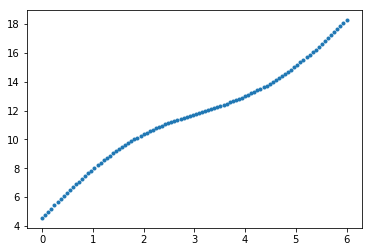

In [99]:
xs = xs = np.linspace(0,6,100)
ys = np.array([  4.56      ,   4.77631801,   4.99236246,   5.20786079,
         5.42254245,   5.63613989,   5.84838954,   6.05903277,
         6.26781686,   6.47449592,   6.67883177,   6.88059486,
         7.07956506,   7.27553253,   7.46829841,   7.65767565,
         7.84348959,   8.02557869,   8.20379507,   8.37800508,
         8.54808979,   8.71394539,   8.87548362,   9.03263207,
         9.18533445,   9.33355078,   9.47725759,   9.61644793,
         9.75113145,   9.88133434,  10.00709927,  10.12848518,
        10.24556709,  10.35843583,  10.46719772,  10.57197412,
        10.67290105,  10.77012868,  10.86382072,  10.9541539 ,
        11.04131728,  11.12551153,  11.20694826,  11.28584918,
        11.36244533,  11.4369762 ,  11.50968885,  11.58083706,
        11.65068031,  11.7194829 ,  11.78751294,  11.85504137,
        11.92234098,  11.98968541,  12.05734812,  12.12560141,
        12.1947154 ,  12.26495706,  12.33658922,  12.4098696 ,
        12.48504987,  12.56237473,  12.64208098,  12.7243967 ,
        12.80954039,  12.89772014,  12.98913293,  13.08396383,
        13.18238539,  13.28455695,  13.39062409,  13.5007181 ,
        13.61495545,  13.73343744,  13.85624974,  13.98346214,
        14.11512829,  14.25128545,  14.39195442,  14.53713941,
        14.68682806,  14.84099147,  14.99958431,  15.16254498,
        15.32979585,  15.50124353,  15.67677922,  15.85627912,
        16.03960485,  16.226604  ,  16.41711067,  16.61094608,
        16.80791921,  17.00782755,  17.21045779,  17.41558662,
        17.62298157,  17.83240185,  18.04359923,  18.25631894])
plt.plot(xs,ys,'.');

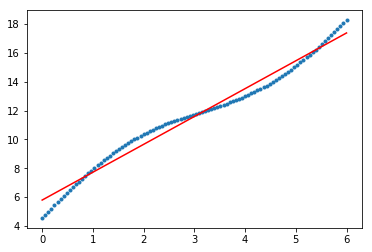

In [102]:
plt.plot(xs,ys,'.');
newX = xs

newY = ys
sumX = sum(xs)
n = len(xs)
    
A = np.array(
[
    [sum(newX**2), sumX],
    [sumX, n]
])
B = np.array([sum(newX*newY), sum(newY)])
a,b =solveSysEq(A,B)
def f(x, a, b):
    return a*x + b
xx = np.linspace(0,6,1000)
yy = [f(x,a,b) for x in xx]
plt.plot(xx,yy,color="red")

# 5) Monte Carlo Integration

5.1) Evaluate the following integral using Monte Carlo method.

$$ \iiint \limits_C e^{-x^2 + 2y - z} \; dx \; dy \; dz$$

where $C$ is a sphere of radius 2 centered at $(1,2,3)$

In [21]:
n = 100000
x = np.random.random(n)*4-1
y = np.random.random(n)*4
z = np.random.random(n)*4+1

summ = 0
for i in range(n):
    if((x[i]-1)**2+(y[i]-2)**2+(z[i]-3)**2<=4):
        summ+=math.e**(-(x[i]**2)+(2*y[i])-z[i])

summ*(64/n)

196.31843911922212

5.2) Evaluate the following integral

$$ \iint \limits_D \left(\sin(x)+\cos(y)\right)^2 \; dx \; dy$$

where $D$ the red area show in the picture below. It is the **union** of
- circle which centers at (-1.5, 0) with radius 2
- circle which centers at (1, 0) with readius 2

<img src="area.png"/>

In [75]:
n = 100000
x = np.random.random(n)*4-3.5
y = np.random.random(n)*4-2
x1 = np.random.random(n)*4-1
y1 = np.random.random(n)*4-2
summ = 0
for i in range(n):
    if((x[i]+1.5)**2+(y[i])**2<=4):
        summ+=(math.sin(x[i])+math.cos(y[i]))**2
for i in range(n):
    if((x1[i]+1.5)**2+(y1[i])**2<=4):
        continue
    elif((x1[i]-1)**2+(y1[i])**2<=4):
        summ+=(math.sin(x1[i])+math.cos(y1[i]))**2
a= 6.5*4
summ*(a/(n+n))

17.770425310506695

# 6) Minimization

11.1 Surround Speakers problem. Nowadays the sound system gets so fancy we even have 11.1 speakers. That's the total of 11 speakers + 1 subwoofer.

Given this many speakers one problem that becomes less trivial is the delay between speakers. We want to hear the sound from all the speaker at the same time. Since sound travel at constant speed in air, we will hear from the speaker that is **nearest** to us first and the **furthest** speaker last. If these **two distances** are **too different**, the listener would get confused.

Placing a speaker in a cicular manner would have solved this problem but that would ruins all the interior design. So we will fix where the speakers are but we will change where we sit instead.

So the goal for this problem is to figure out where we should sit so we can hear sound from all speaker **at the same time as much as possible**. In other words, the distance from all speakers should be as equal as possible.

Be sure to justify your cost functions.

This is a semi-openended problem. Anything sensible goes. Be careful about starting position.

0.078476407389 0.27147998704


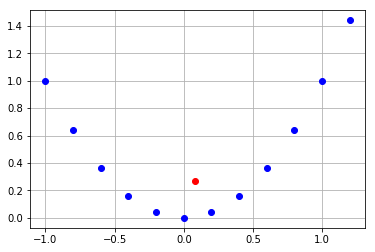

In [65]:
from scipy.optimize import minimize
# theta = np.linspace(0,6,12)
# xs = np.cos(theta) + np.linspace(0,2,12)
# ys = np.sin(theta) - np.linspace(0,2,12)
tmp = np.linspace(-1,1.2,12)
xs = tmp
ys = xs**2
plt.plot(xs, ys, 'ob')
plt.grid(True)

def cost(w):
    wx, wy = w
    cost =0
    for i in range(12):
        cost+=((xs[i]-wx)**2 +(ys[i]-wy)**2)**0.5
    return cost

res = scipy.optimize.minimize(cost, [0,0.2])
ansx, ansy =res.x
print(ansx,ansy)
plt.plot(ansx, ansy,"or")


The cost function is calculating the distance of a point w with all the 12 points given summing them up

In [70]:
print("!==========================================!")
print("!====IGNORE TWO BLOCK OF CODE BELOW :D ====!")
print("!==========================================!")

!==========================================!
!====IGNORE TWO BLOCK OF CODE BELOW :D ====!
!==========================================!


0.07628437011213496 0.2721457319529241


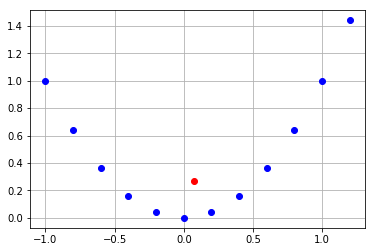

In [66]:
#IGNORE THIS JUST I JUST WANT TO KEEP THIS (hillclimb) :D
from scipy.optimize import minimize
# theta = np.linspace(0,6,12)
# xs = np.cos(theta) + np.linspace(0,2,12)
# ys = np.sin(theta) - np.linspace(0,2,12)
tmp = np.linspace(-1,1.2,12)
xs = tmp
ys = xs**2
plt.plot(xs, ys, 'ob')
plt.grid(True)

def cost(w):
    wx, wy = w
    cost =0
    for i in range(12):
        cost+=((xs[i]-wx)**2 +(ys[i]-wy)**2)**0.5
    return cost

def minimizationHillClimb(w,n):
    minD = cost(w)
    for i in range(n):
        xx = np.random.random()*2.2-1
        yy = np.random.random()*1.44
        newCost = cost((xx,yy))
        if (newCost<minD):
            minD = newCost
            w = (xx,yy)
    return minD,w

lowD, ww =minimizationHillClimb((0,0.2),100000)
plt.plot(ww[0], ww[1],"or")
print(ww[0], ww[1])

WORKING IN ATTACHED JPG FILE JamesWorking#6.jpg


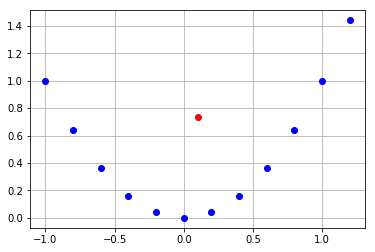

In [67]:
#IGNORE THIS JUST I JUST WANT TO KEEP THIS (Center of mass something from genmath2) :D
from scipy.optimize import minimize
# theta = np.linspace(0,6,12)
# xs = np.cos(theta) + np.linspace(0,2,12)
# ys = np.sin(theta) - np.linspace(0,2,12)
tmp = np.linspace(-1,1.2,12)
xs = tmp
ys = xs**2
plt.plot(xs, ys, 'ob')
plt.grid(True)
# plt.plot(1.2,1.44,".r")
plt.plot(0.1, 0.736, "or")
print("WORKING IN ATTACHED JPG FILE JamesWorking#6.jpg")
#0.003 1.22


So basically I use the center of mass, since the center of mass is the unique position at which the weighted position vectors of all the parts of a system sum up to zero. Since the all other speaker are align on the line $y=x^2$ So I enclose the curve with a line from two highest speakers. 

#WHICH IS WRONGG LOL 
 

# 7) Monte Carlo Simulations.

Consider a dice game between two person.

 - Each person throw a dice two times.
 - If the results of the two dices are different. The score is calculated by the sum. Eg. $(5,6) \to 5+6 = 11$
 - If the results of the two dices are the same. The score is 5 times the sum of the two. Eg. $(1,1) \to 5 \times(1+1) = 10$
 
 You are presented with 2 dices.
  - A standard 6 sided fair dice. Faces are 1,2,3,4,5,6.
  - A fair dice 6 sided dice. Faces are 1,2,3,1,2,3. Hoping for higher chance of getting bonus.
  
Which dice has higher probability of winning?

1 Fair Dice Win
2 Standard Dice Win
3 Draw


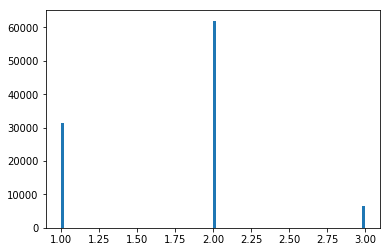

In [139]:
def rollStandardDie():
    x = np.random.random()
    if (x <=1/6):
        return 1
    elif (x<=2/6):
        return 2
    elif (x<=3/6):
        return 3
    elif (x<=4/6):
        return 4
    elif (x<=5/6):
        return 5
    else: 
        return 6
def rollFairDie():
    x = np.random.random()
    if (x <=1/6):
        return 1
    elif (x<=2/6):
        return 2
    elif (x<=3/6):
        return 3
    elif (x<=4/6):
        return 1
    elif (x<=5/6):
        return 2
    else: 
        return 3
    
def Simulations():
    a1 = rollStandardDie()
    a2 = rollStandardDie()
    aFair1 = rollFairDie()
    aFair2 = rollFairDie()
    ScoreA = a1 + a2
    ScoreFairA = aFair1 + aFair2
    if(a1 == a2):
        ScoreA *= 5
    if(aFair1 == aFair2):
        ScoreFairA *=5
    if (ScoreFairA>ScoreA):
        return 1
    elif(ScoreFairA<ScoreA):
        return 2
    else:
        return 3
x=[Simulations() for i in range(100000)]
plt.hist(x, bins=100); 
print(1, "Fair Dice Win")
print(2, "Standard Dice Win")
print(3, "Draw")


Standard Dice is a better dice.

# 8) <span style="color:#bc47bc">Couple</span><span style="color:#515489">Maker</span>

Gift saw Ply business going well. She wants to make money too. She decides to stop playing Widowmaker on Overwatch and build a startup matchmaking service called <span style="color:#bc47bc">Couple</span><span style="color:#515489">Maker</span>. 

Her clients consists of equal amount of male and female.

Everyone get to look at the profile of everyone of the opposite sex and put down the number on how much he/she is willing to pay if <span style="color:#bc47bc">Couple</span><span style="color:#515489">Maker</span> match he/she to that person.

To illustrate, let us consider if there are 4 person: M1, M2, F1 and F2. Where the prefix M indicates male and F indicates female.
 - M1 see the profile of F1 and F2 and decide to write down 5 Dollars for F1 and 10 Dollars for F2.
 - M2 see the profile of F1 and F2 and decide to write down 7 Dollars for F1 and 20 Dollars for F2.
 - F1 see the profile of M1 and M2 and decide to write down 12 Dollars for M1 and 2 Dollars for M2.
 - F2 see the profile of M1 and M2 and decide to write down 15 Dollars for M1 and 1 Dollar for M2.

Suppose that <span style="color:#bc47bc">Couple</span><span style="color:#515489">Maker</span> system match (M1 with F1) and (M2 with F2). Then the company will receive payment of

- 5 Dollars from M1
- 12 Dollars from F1
- 20 Dollars from M2
- 1 Dollar from F2

which gives the total of 38$.

## The Problem

Gift has 50 male clients and 50 female clients and she wants to **maximize** the revenue. The amount of money are willing to pay each depending whom they got matched with is given in matrix $rfm$(rating from male) and $rff$(rating from remale)

- ```rfm[m, f]``` is how much male $m$ would pay if he is matched with female $f$
- ```rff[f, m]``` is how much a female $f$ would pay if she is matched with male $m$

Use Hill climbing to help Gift maximize the revenue by finding out who should be match with whom.











In [23]:
# np.random.seed(100)
# rfm = np.random.randn(50,50)**2 *100
# rff = np.random.randn(50,50)**2 *50 + 50
# np.savetxt('rfm.txt', rfm)
# np.savetxt('rff.txt', rff)
rfm = np.loadtxt('rfm.txt')
rff = np.loadtxt('rff.txt')

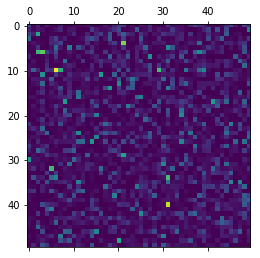

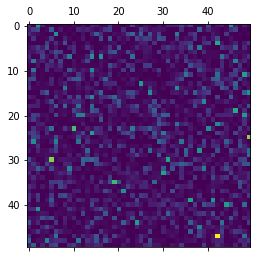

In [24]:
plt.matshow(rfm)
plt.matshow(rff)

In [25]:
print(rfm[1,0])
print(rff[0,1])

141.138581154
51.4619086211


In [26]:
def Cost(L):
    cost =0
    for ech in L:
        cost+= rfm[ech[0], ech[1]] + rff[ech[1],ech[0]]
    return cost

def CoupleMaker(L, n):
    maxRev = Cost(L)
    for i in range(n):
        firstSwappedIndex = np.random.randint(50)
        secondSwappedIndex = np.random.randint(50)
        if (firstSwappedIndex == secondSwappedIndex):
            continue
        newL = np.copy(L)
        newL[firstSwappedIndex][1] = L[secondSwappedIndex][1]
        newL[secondSwappedIndex][1] = L[firstSwappedIndex][1]
        tempMax = Cost(newL)
        if (maxRev<tempMax):
            L = np.copy(newL)
            maxRev = tempMax
    return (maxRev, L)

def generateIni():
    npa = [np.array([i,i]) for i in range(50)]
    return np.array(npa)
L= generateIni()

cost,maxRev=CoupleMaker(L, 1000000)
print(cost)
print(maxRev)

35332.8279
[[ 0 38]
 [ 1 26]
 [ 2 41]
 [ 3 43]
 [ 4 21]
 [ 5 32]
 [ 6  2]
 [ 7 27]
 [ 8  8]
 [ 9 10]
 [10  6]
 [11 16]
 [12 30]
 [13 23]
 [14 18]
 [15 47]
 [16 11]
 [17 48]
 [18 22]
 [19 35]
 [20 34]
 [21 37]
 [22 17]
 [23  3]
 [24 44]
 [25 36]
 [26 14]
 [27 46]
 [28 19]
 [29 13]
 [30  0]
 [31  9]
 [32  5]
 [33 45]
 [34  1]
 [35  4]
 [36 24]
 [37 12]
 [38 28]
 [39 49]
 [40 31]
 [41 39]
 [42 25]
 [43 40]
 [44 42]
 [45 33]
 [46 15]
 [47  7]
 [48 20]
 [49 29]]


0